In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df =pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

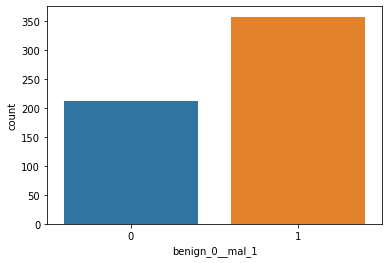

In [6]:
# countplot is good for calssification 
sns.countplot(x='benign_0__mal_1', data = df)

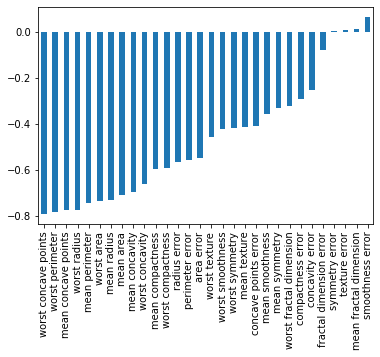

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind= 'bar')

In [13]:
# there is a strong correlation between mutiple features and this should produce a good model

In [61]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
X.shape

(569, 30)

In [60]:
X
X.shape

(569, 30)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential


In [24]:
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [28]:
model = Sequential ()
model.add(Dense(30,activation= 'relu'))
model.add(Dense(15,activation= 'relu'))

# Sigmoid is more suitable for Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 400)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 0s 1ms/sample - loss: 0.6811 - val_loss: 0.6584
Epoch 2/400
426/426 [==============================] - 0s 83us/sample - loss: 0.6414 - val_loss: 0.6160
Epoch 3/400
426/426 [==============================] - 0s 73us/sample - loss: 0.5916 - val_loss: 0.5599
Epoch 4/400
426/426 [==============================] - 0s 93us/sample - loss: 0.5301 - val_loss: 0.4929
Epoch 5/400
426/426 [==============================] - 0s 87us/sample - loss: 0.4687 - val_loss: 0.4367
Epoch 6/400
426/426 [==============================] - 0s 84us/sample - loss: 0.4175 - val_loss: 0.3877
Epoch 7/400
426/426 [==============================] - 0s 75us/sample - loss: 0.3684 - val_loss: 0.3434
Epoch 8/400
426/426 [==============================] - 0s 102us/sample - loss: 0.3315 - val_loss: 0.3088
Epoch 9/400
426/426 [=======

426/426 [==============================] - 0s 82us/sample - loss: 0.0383 - val_loss: 0.1347
Epoch 153/400
426/426 [==============================] - 0s 92us/sample - loss: 0.0370 - val_loss: 0.1397
Epoch 154/400
426/426 [==============================] - 0s 86us/sample - loss: 0.0393 - val_loss: 0.1313
Epoch 155/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0371 - val_loss: 0.1399
Epoch 156/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0376 - val_loss: 0.1369
Epoch 157/400
426/426 [==============================] - 0s 110us/sample - loss: 0.0482 - val_loss: 0.1254
Epoch 158/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0429 - val_loss: 0.1387
Epoch 159/400
426/426 [==============================] - 0s 113us/sample - loss: 0.0389 - val_loss: 0.1401
Epoch 160/400
426/426 [==============================] - 0s 88us/sample - loss: 0.0365 - val_loss: 0.1361
Epoch 161/400
426/426 [==============================] - 0

426/426 [==============================] - 0s 64us/sample - loss: 0.0239 - val_loss: 0.1635
Epoch 307/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0223 - val_loss: 0.1574
Epoch 308/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0219 - val_loss: 0.1640
Epoch 309/400
426/426 [==============================] - 0s 93us/sample - loss: 0.0212 - val_loss: 0.1553
Epoch 310/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0233 - val_loss: 0.1609
Epoch 311/400
426/426 [==============================] - 0s 85us/sample - loss: 0.0225 - val_loss: 0.1618
Epoch 312/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0227 - val_loss: 0.1768
Epoch 313/400
426/426 [==============================] - 0s 108us/sample - loss: 0.0270 - val_loss: 0.1588
Epoch 314/400
426/426 [==============================] - 0s 113us/sample - loss: 0.0212 - val_loss: 0.1645
Epoch 315/400
426/426 [==============================] - 0

In [30]:
Loss_comp = pd.DataFrame(model.history.history)

In [32]:
Loss_comp.columns =['TainingData_Loss', 'ValData_Loss']
Loss_comp

,TainingData_Loss,ValData_Loss
0,0.681123,0.658387
1,0.641377,0.616037
2,0.591577,0.559912
3,0.530096,0.492885
4,0.468685,0.436685
...,...,...
395,0.017215,0.180564
396,0.019202,0.211798
397,0.015122,0.178616
398,0.015719,0.195678


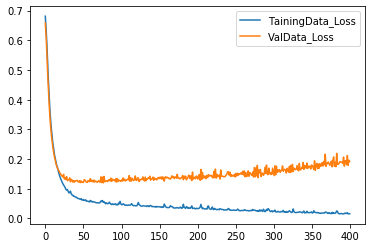

In [34]:
Loss_comp.plot()

In [35]:
#typical example of overfitting - too many epochs leading to overfitting

In [36]:
# Using callbacks from Tensorflow to stop the model from building furhter on, by cross referencing with the validation data

In [37]:
model = Sequential ()
model.add(Dense(30,activation= 'relu'))
model.add(Dense(15,activation= 'relu'))

# Sigmoid is more suitable for Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose = 1, patience = 25)
#Mode can be min or max depending on the value we are trying to optimise.
#If its loss function, then we minimise
#if its accuracy then we maximise
# The patience waits for 25 more epochs after figuring out the stopping point to get rid of influence of noise in data 

In [42]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 600,callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6950 - val_loss: 0.6782
Epoch 2/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6568 - val_loss: 0.6412
Epoch 3/600
426/426 [==============================] - 0s 60us/sample - loss: 0.6197 - val_loss: 0.6031
Epoch 4/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5776 - val_loss: 0.5551
Epoch 5/600
426/426 [==============================] - 0s 97us/sample - loss: 0.5254 - val_loss: 0.5016
Epoch 6/600
426/426 [==============================] - 0s 62us/sample - loss: 0.4746 - val_loss: 0.4488
Epoch 7/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4245 - val_loss: 0.3997
Epoch 8/600
426/426 [==============================] - 0s 69us/sample - loss: 0.3792 - val_loss: 0.3537
Epoch 9/600
426/426 [==============================] - 0s 64us/sample - loss: 0.3403 - val_loss: 0.3164
Epoch 10/600
426/42

In [43]:
# the model stopped at 78th epoch. The callback also gives us the felixibility to add a random epoch as we know the
# model would stop training

In [44]:
Loss_comp = pd.DataFrame(model.history.history)

In [45]:
Loss_comp.columns =['TainingData_Loss', 'ValData_Loss']
Loss_comp

,TainingData_Loss,ValData_Loss
0,0.694962,0.678152
1,0.656801,0.641208
2,0.619709,0.603087
3,0.577576,0.555096
4,0.525419,0.501625
...,...,...
73,0.054388,0.115972
74,0.058398,0.118236
75,0.058354,0.122051
76,0.053024,0.118778


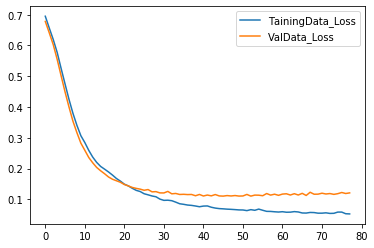

In [46]:
Loss_comp.plot()

In [48]:
model = Sequential ()
model.add(Dense(30,activation= 'relu'))
model.add(Dropout(0.5))
# the dropout(0.5) means half of the 30 layers will be randomly turned off in each epoch 
model.add(Dense(15,activation= 'relu'))
model.add(Dropout(0.5))
# Sigmoid is more suitable for Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer='adam')

In [49]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 600,callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6816 - val_loss: 0.6689
Epoch 2/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6836 - val_loss: 0.6570
Epoch 3/600
426/426 [==============================] - 0s 65us/sample - loss: 0.6610 - val_loss: 0.6475
Epoch 4/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6487 - val_loss: 0.6310
Epoch 5/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6392 - val_loss: 0.6088
Epoch 6/600
426/426 [==============================] - 0s 65us/sample - loss: 0.6029 - val_loss: 0.5788
Epoch 7/600
426/426 [==============================] - 0s 81us/sample - loss: 0.5941 - val_loss: 0.5489
Epoch 8/600
426/426 [==============================] - 0s 69us/sample - loss: 0.5857 - val_loss: 0.5217
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5777 - val_loss: 0.5019
Epoch 10/600
426/42

426/426 [==============================] - 0s 71us/sample - loss: 0.0879 - val_loss: 0.0943
Epoch 156/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0944 - val_loss: 0.0929
Epoch 157/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0747 - val_loss: 0.0842
Epoch 158/600
426/426 [==============================] - 0s 67us/sample - loss: 0.1025 - val_loss: 0.1038
Epoch 159/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0728 - val_loss: 0.0935
Epoch 160/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0888 - val_loss: 0.0968
Epoch 161/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0635 - val_loss: 0.1010
Epoch 162/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0755 - val_loss: 0.1143
Epoch 163/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0719 - val_loss: 0.1118
Epoch 00163: early stopping


In [50]:
Loss_comp = pd.DataFrame(model.history.history)

In [51]:
Loss_comp.columns =['TainingData_Loss', 'ValData_Loss']
Loss_comp

,TainingData_Loss,ValData_Loss
0,0.681607,0.668889
1,0.683573,0.657037
2,0.661048,0.647476
3,0.648708,0.631046
4,0.639225,0.608774
...,...,...
158,0.072773,0.093529
159,0.088826,0.096795
160,0.063530,0.100961
161,0.075543,0.114267


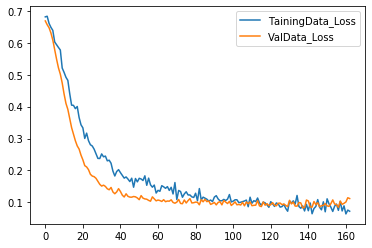

In [52]:
Loss_comp.plot()

In [53]:
# fitting to the test set

In [54]:
predictions = model.predict_classes (X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [58]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
